### Importing required libraries and reading dataset into a dataframe

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [36]:
df[df.isnull()].count()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [37]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

### Calculating if a person is overweight and adding a column 'overweight'

In [38]:
df['overweight'] = (df['weight'] / df['height'] / 100**2) > 25

In [39]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,False
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,False
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False


In [40]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,False
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,False
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,False
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,False
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,False


In [41]:
df['overweight'].unique()

array([False])

In [42]:
df['gender'].unique()

array([2, 1, 3], dtype=int64)

### Normalizing data by declaring 0 to be good and 1 ot be bad
 cholestrol = 0 is good, cholestrol = 1 is bad <br>
 glucose = 0 is good, glucose = 1 is bad <br>
 and if the value of cholestrol or glucose is 1, make it 0 <br>
 if the value of cholestrol or glucose is more than 1, make it 1 <br>

In [43]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

In [44]:
df['gluc'].unique()

array([1, 2, 3], dtype=int64)

In [45]:
medical_data = {1:0, 2:1, 3:1}
df['cholesterol'] = df['cholesterol'].map(medical_data)
df['gluc'] = df['gluc'].map(medical_data)

In [46]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,False
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,False
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False


### Creating a dataframe for categorical values

In [47]:
df_categorical = pd.melt(
                    frame = df,
                    value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],
                    id_vars = ['cardio']
                 )

In [48]:
df_categorical

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,False
419996,1,overweight,False
419997,1,overweight,False
419998,1,overweight,False


In [49]:
# grouping and reformatting the dataframe to split it by 'cardio'.
df_categorical = pd.DataFrame(
                    df_categorical.groupby(
                    ['variable', 'value', 'cardio']) ['value'].count()).rename(columns = {'value': 'total'}).reset_index()

In [50]:
df_categorical.head()

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080


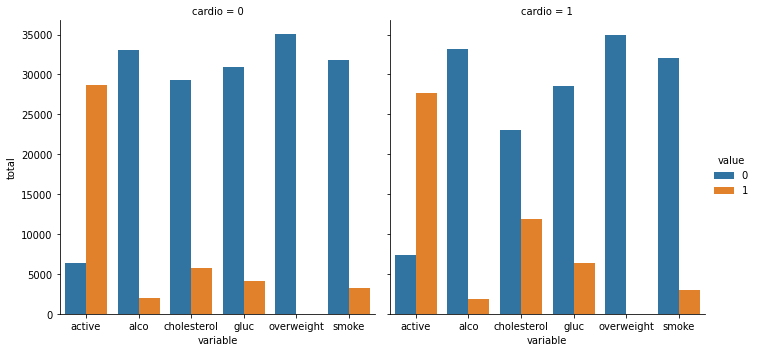

In [51]:
sns.catplot(x = 'variable', 
            y = 'total',
            hue = 'value',
            col = 'cardio',
            data = df_categorical,
            kind = 'bar')

In [53]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003457,0.003154,-0.003038,-0.001830,0.003356,-0.002529,0.005290,0.002844,-0.003699,0.001210,0.003755,0.003799,NaN
age,0.003457,1.000000,-0.022609,-0.081515,0.053684,0.020764,0.017647,0.129697,0.088099,-0.047633,-0.029723,-0.009927,0.238159,NaN
gender,0.003154,-0.022609,1.000000,0.498221,0.155115,0.005985,0.015195,-0.034729,-0.018318,0.337664,0.170682,0.005991,0.007953,NaN
height,-0.003038,-0.081515,0.498221,1.000000,0.290968,0.005488,0.006150,-0.048532,-0.019400,0.187989,0.094419,-0.006570,-0.010821,NaN
weight,-0.001830,0.053684,0.155115,0.290968,1.000000,0.030702,0.043710,0.137981,0.120407,0.067780,0.067113,-0.016867,0.181660,NaN
ap_hi,0.003356,0.020764,0.005985,0.005488,0.030702,1.000000,0.016086,0.024730,0.012886,-0.000922,0.001408,-0.000033,0.054475,NaN
ap_lo,-0.002529,0.017647,0.015195,0.006150,0.043710,0.016086,1.000000,0.026504,0.013747,0.005186,0.010601,0.004780,0.065719,NaN
cholesterol,0.005290,0.129697,-0.034729,-0.048532,0.137981,0.024730,0.026504,1.000000,0.383252,0.017839,0.043610,0.005911,0.205536,NaN
gluc,0.002844,0.088099,-0.018318,-0.019400,0.120407,0.012886,0.013747,0.383252,1.000000,0.002087,0.020606,-0.009061,0.090876,NaN
smoke,-0.003699,-0.047633,0.337664,0.187989,0.067780,-0.000922,0.005186,0.017839,0.002087,1.000000,0.340094,0.025858,-0.015486,NaN
